# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0..4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5..9].

## 1. Import necessary libraries for the model

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D


## 2. Import MNIST data and create 2 datasets with one dataset having digits from 0 to 4 and other from 5 to 9 

In [0]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
# dataset with digits from 0 to 4
x_train_1 = x_train[y_train < 5]
y_train_1 = y_train[y_train < 5]
x_test_1 = x_test[y_test < 5]
y_test_1 = y_test[y_test < 5]

In [0]:
# dataset with digits from 5 to 9
x_train_2 = x_train[y_train >= 5]
y_train_2 = y_train[y_train >= 5] - 5
x_test_2 = x_test[y_test >= 5]
y_test_2 = y_test[y_test >= 5] - 5

## 3. Print x_train, y_train, x_test and y_test for both the datasets

In [102]:
print(x_train_1.shape)
print(y_train_1.shape)
print(x_test_1.shape)
print(y_test_1.shape)

(30596, 28, 28)
(30596,)
(5139, 28, 28)
(5139,)


In [103]:
print(x_train_2.shape)
print(y_train_2.shape)
print(x_test_2.shape)
print(y_test_2.shape)

(29404, 28, 28)
(29404,)
(4861, 28, 28)
(4861,)


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 128 128 255 255 255 255 255 255 128
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  64 255 255 255 255 255 255 255 255 255
  128   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  64 255 255 255 191  64   0   0 128 191 255
  255  64   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 191 255 255  64   0   0   0   0   0 128 255
  255 128   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 191 255 128   0   0   0   0   0   

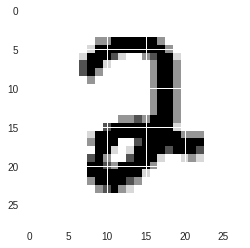

In [96]:
import matplotlib.pyplot as plt

%matplotlib inline

print(x_train_1[1000])

plt.imshow(x_train_1[1000])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  18 105 227 253 253 253 193 113   4   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  57 199 253 252 252 252 252 253 252 186  28
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   8 128 246 252 250 160  21  21  21 144 238 252 212
   21   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  55 197 252 252 199  70   0   0   0   0   0  28 142 252
  182   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 148 252 252 226  24   0   0   0   0   0   0   

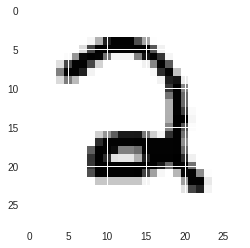

In [97]:
import matplotlib.pyplot as plt

%matplotlib inline

print(x_test_1[1000])

plt.imshow(x_test_1[1000])

## ** 4. Let us take only the dataset (x_train, y_train, x_test, y_test) for Integers 0 to 4 in MNIST **
## Reshape x_train and x_test to a 4 Dimensional array (channel = 1) to pass it into a Conv2D layer

In [0]:
#reshape 0 to 4 dataset
x_train_11 = x_train_1.reshape(30596, 28, 28, 1).astype('float32')
x_test_11 = x_test_1.reshape(5139, 28, 28, 1).astype('float32')

In [0]:
x_train_11

In [0]:
x_test_11

In [0]:
#reshape 5 to 9 dataset
x_train_21 = x_train_2.reshape(29404, 28, 28, 1).astype('float32')
x_test_21 = x_test_2.reshape(4861, 28, 28, 1).astype('float32')

In [0]:
x_train_21

In [0]:
x_test_21

## 5. Normalize x_train and x_test by dividing it by 255

In [124]:
#Normalizing the input 0 to 4
x_train_11 /= 255
x_test_11 /= 255
print('x_train_11 shape:', x_train_11.shape)
print(x_train_11.shape[0], 'train samples')
print(x_test_11.shape[0], 'test samples')


('x_train_11 shape:', (30596, 28, 28, 1))
(30596, 'train samples')
(5139, 'test samples')


In [129]:
#Normalizing the input 5 to 9
x_train_21 /= 255
x_test_21 /= 255
print('x_train_21 shape:', x_train_21.shape)
print(x_train_21.shape[0], 'train samples')
print(x_test_21.shape[0], 'test samples')

('x_train_21 shape:', (29404, 28, 28, 1))
(29404, 'train samples')
(4861, 'test samples')


## 6. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
# convert class vectors to binary class matrices
y_train_set1 = keras.utils.to_categorical(y_train_1, 5)
y_test_set2 = keras.utils.to_categorical(y_test_1, 5)


In [0]:
# convert class vectors to binary class matrices
y_train_set2 = keras.utils.to_categorical(y_train_2, 5)
y_test_set2 = keras.utils.to_categorical(y_test_2, 5)

## 7. Build a sequential model with 2 Convolutional layers with 32 kernels of size (3,3) followed by a Max pooling layer of size (2,2) followed by a drop out layer to be trained for classification of digits 0-4  

In [0]:
#Initialize the model
model = Sequential()

#Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1),name='conv_1'))

#Add a Convolutional Layer with 64 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(64, (3, 3), activation='relu',name='conv_2'))

#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.25 probability 
model.add(Dropout(0.25,name='drop_1'))

#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))


#Add Fully Connected Layer with 5 units and activation function as 'softmax'
model.add(Dense(5, activation='softmax'))

## 8. Post that flatten the data and add 2 Dense layers with 128 neurons and neurons = output classes with activation = 'relu' and 'softmax' respectively. Add dropout layer inbetween if necessary  

## 9. Print the training and test accuracy

## 10. Make only the dense layers to be trainable and convolutional layers to be non-trainable

## 11. Use the model trained on 0 to 4 digit classification and train it on the dataset which has digits 5 to 9  (Using Transfer learning keeping only the dense layers to be trainable)

## 12. Print the accuracy for classification of digits 5 to 9

## Sentiment analysis <br> 

The objective of the second problem is to perform Sentiment analysis from the tweets data collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

### 13. Read the dataset (tweets.csv) and drop the NA's while reading the dataset

In [89]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 14. Preprocess the text and add the preprocessed text in a column with name `text` in the dataframe.

In [0]:
def preprocess(text):
    try:
        return text.decode('ascii')
    except Exception as e:
        return ""

In [0]:
data['text'] = [preprocess(text) for text in data.tweet_text]

### 15. Consider only rows having Positive emotion and Negative emotion and remove other rows from the dataframe.

### 16. Represent text as numerical data using `CountVectorizer` and get the document term frequency matrix

#### Use `vect` as the variable name for initialising CountVectorizer.

### 17. Find number of different words in vocabulary

#### Tip: To see all available functions for an Object use dir

### 18. Find out how many Positive and Negative emotions are there.

Hint: Use value_counts on that column

### 19. Change the labels for Positive and Negative emotions as 1 and 0 respectively and store in a different column in the same dataframe named 'Label'

Hint: use map on that column and give labels

### 20. Define the feature set (independent variable or X) to be `text` column and `labels` as target (or dependent variable)  and divide into train and test datasets

## 21. **Predicting the sentiment:**


### Use Naive Bayes and Logistic Regression and their accuracy scores for predicting the sentiment of the given text

## 22. Create a function called `tokenize_predict` which can take count vectorizer object as input and prints the accuracy for x (text) and y (labels)

In [0]:
def tokenize_test(vect):
    x_train_dtm = vect.fit_transform(x_train)
    print('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    nb = MultinomialNB()
    nb.fit(x_train_dtm, y_train)
    y_pred_class = nb.predict(x_test_dtm)
    print('Accuracy: ', metrics.accuracy_score(y_test, y_pred_class))

### Create a count vectorizer function which includes n_grams = 1,2  and pass it to tokenize_predict function to print the accuracy score

### Create a count vectorizer function with stopwords = 'english'  and pass it to tokenize_predict function to print the accuracy score

### Create a count vectorizer function with stopwords = 'english' and max_features =300  and pass it to tokenize_predict function to print the accuracy score

### Create a count vectorizer function with n_grams = 1,2  and max_features = 15000  and pass it to tokenize_predict function to print the accuracy score

### Create a count vectorizer function with n_grams = 1,2  and include terms that appear at least 2 times (min_df = 2)  and pass it to tokenize_predict function to print the accuracy score